In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
print(os.listdir("./datas"))
import warnings
import json
warnings.filterwarnings("ignore")
from os.path import exists
from sklearn.manifold import TSNE

['matches', 'players_info.csv']


Let's start by displaying all of the events regarding kill, death and assists (kda) of this game 

In [3]:
data = json.load(open('./datas/matches/match_0/replay.json'))
kills = []

for row in data:
    if row == "events":
        for event in data[row]:
            if event["type"] == "CHAMPION_KILL":
                kills_row = {}
                kills_row['KILLER'] = event['killerId']
                kills_row['TIMESTAMP'] = event['timestamp']
                kills_row['VICTIM'] = event['victimId']
                kills_row['ASSIST'] = event['assistingPlayerIds']
                
                kills.append(kills_row)
        
df = pd.DataFrame(kills)
df

,KILLER,TIMESTAMP,VICTIM,ASSIST
0,0,176.840,9,[4]
1,0,180.010,6,[4]
2,2,217.900,7,[]
3,0,266.200,6,[4]
4,9,268.676,0,[6]
5,2,337.806,6,[0]
6,1,339.390,8,[3]
7,0,354.626,9,[2]
8,2,410.354,7,[]
9,6,438.097,0,[9]


For example, if we want to get the kills (+assists and deaths) for the player 0 with the timestamps to use them later :

In [4]:
data = json.load(open('./datas/matches/match_0/replay.json'))
kill = []
death = []
assist = []

for row in data:
    if row == "events":
        for event in data[row]:
            if event["type"] == "CHAMPION_KILL":
                if event['killerId'] == 0:
                    kill.append(event['timestamp'])
                if event["victimId"] == 0:
                    death.append(event['timestamp'])
                if 0 in event["assistingPlayerIds"]:
                    assist.append(event['timestamp'])
                
print("KDA = ", len(kill), "/", len(death), "/", len(assist),"\n")
print("Kills timestamps", kill,"\n")
print("Death timestamps", death,"\n")
print("Assists timestamps", assist)

KDA =  15 / 2 / 6 

Kills timestamps [176.84, 180.01, 266.2, 354.626, 499.236, 707.615, 754.647, 821.404, 821.735, 841.091, 844.756, 863.681, 868.175, 895.524, 903.386] 

Death timestamps [268.676, 438.097] 

Assists timestamps [337.806, 561.633, 565.002, 906.922, 912.604, 932.059]


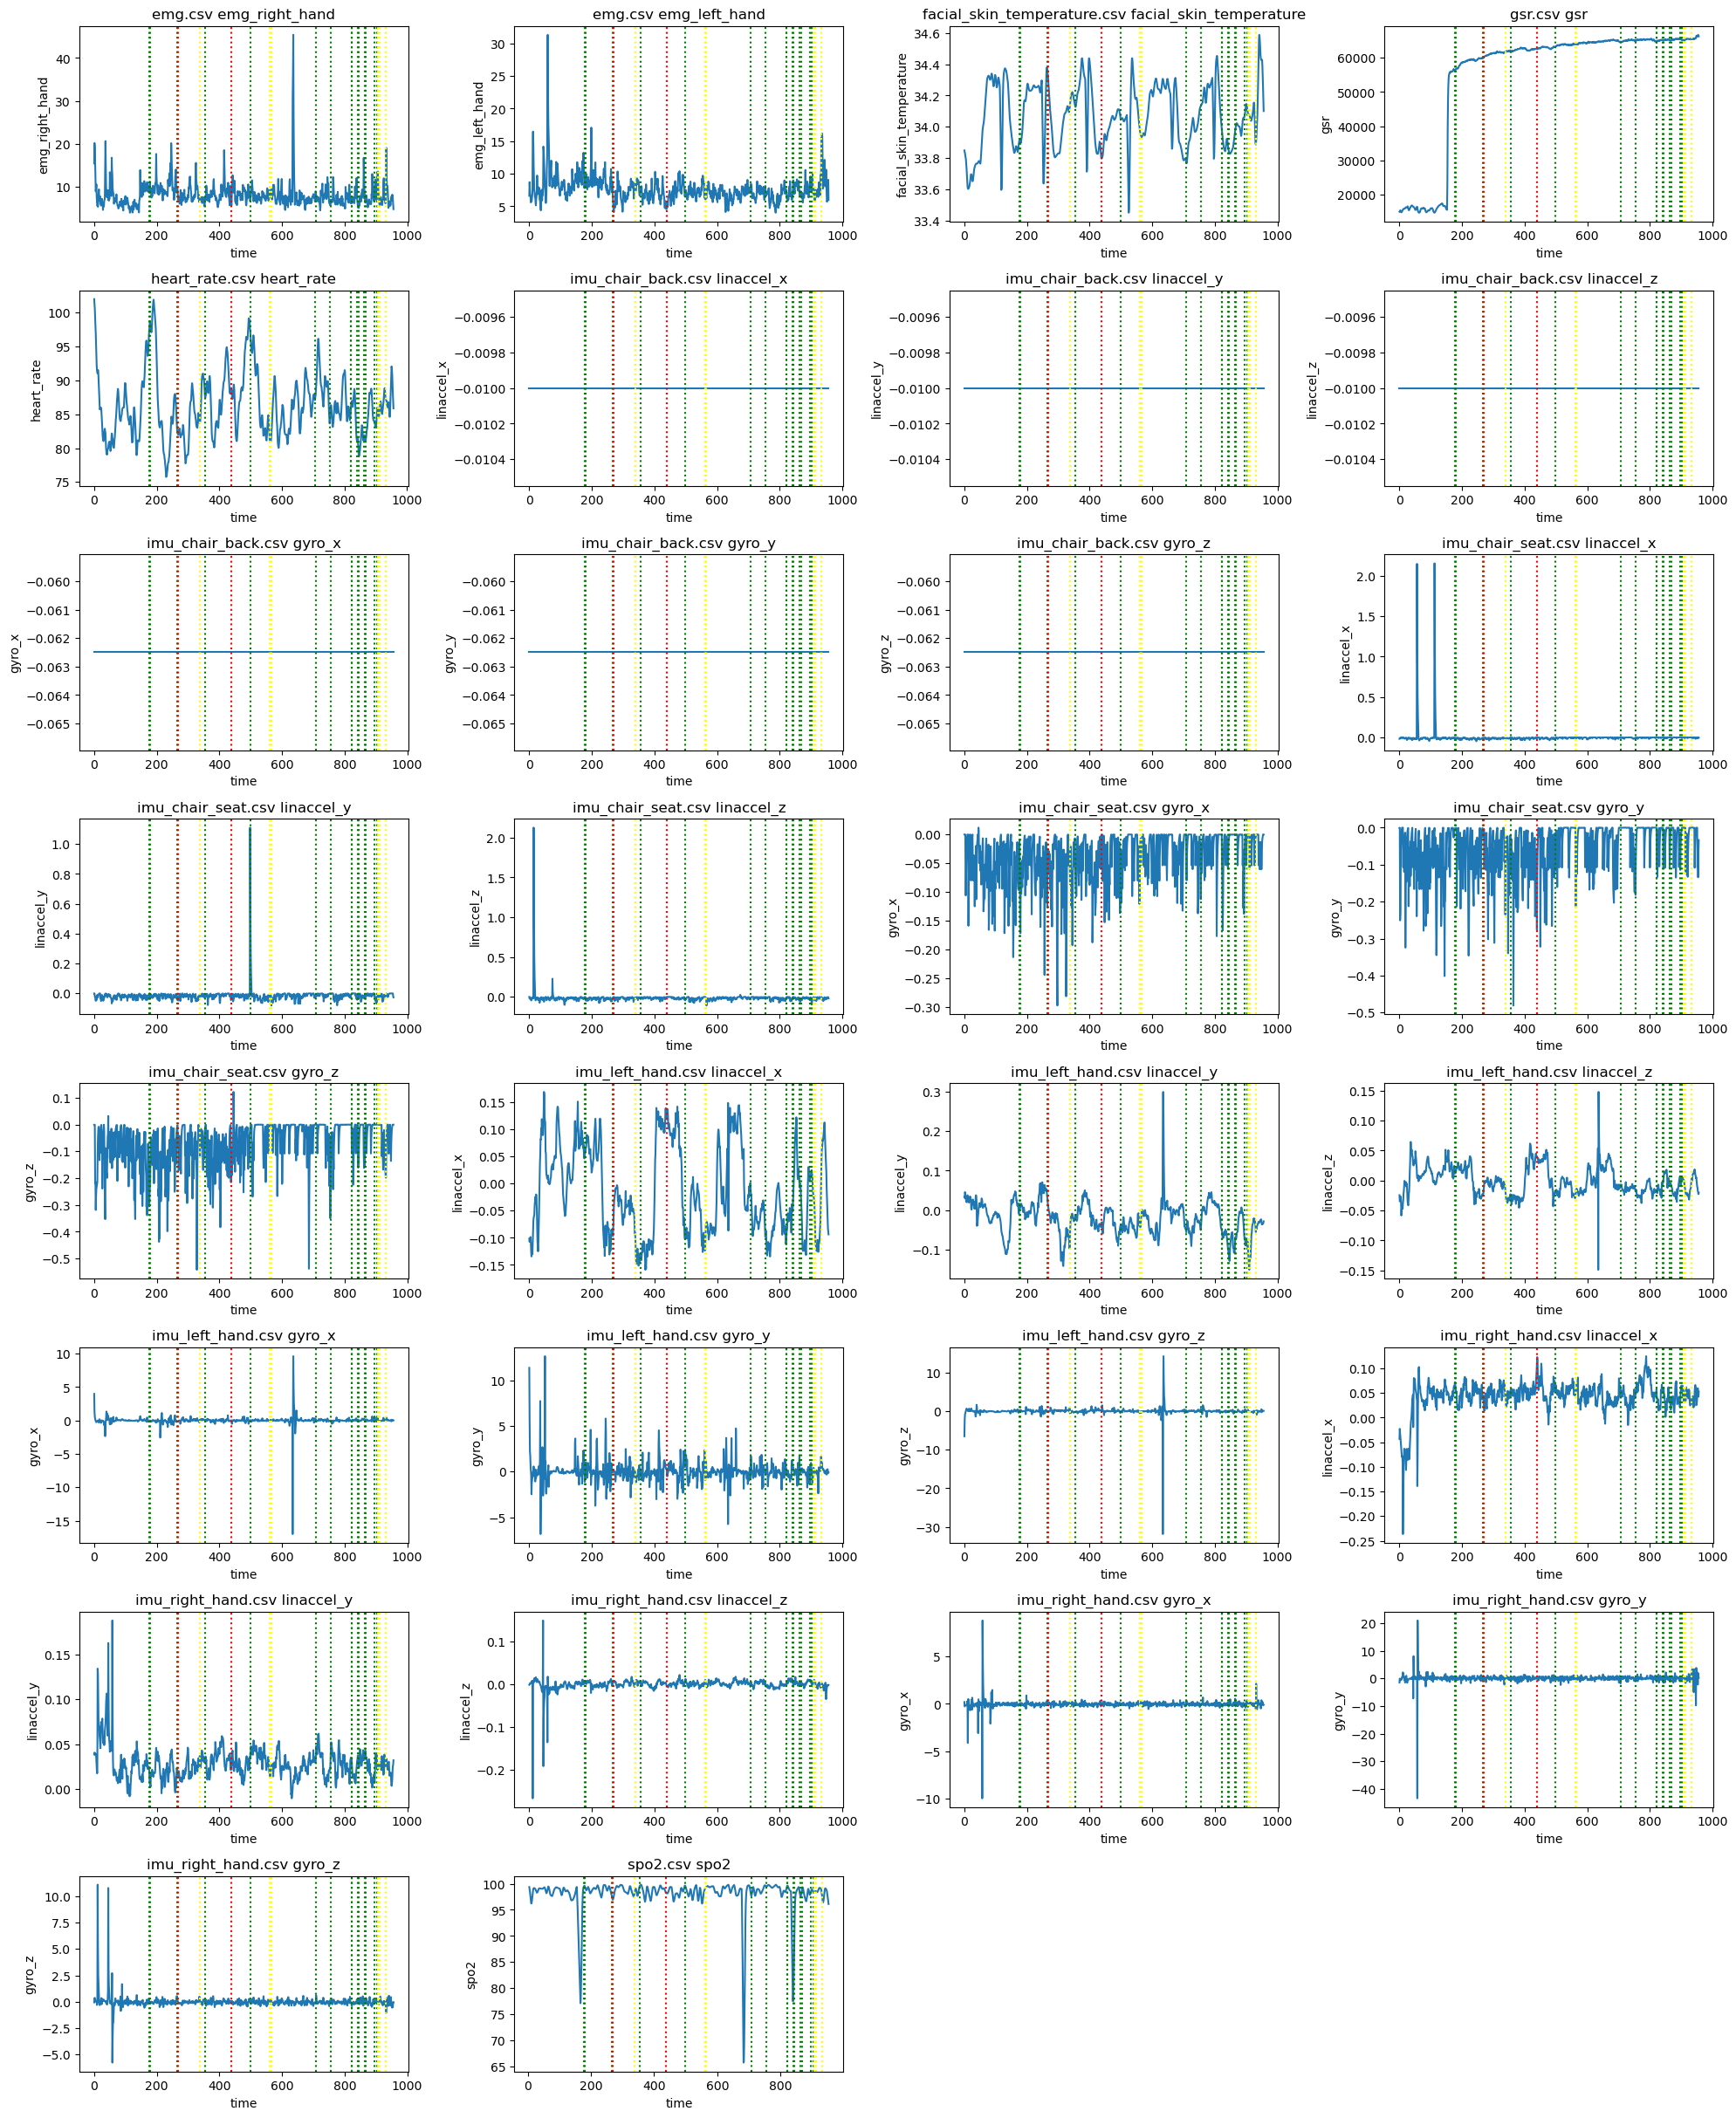

In [5]:
plt.figure(figsize=(20,30))
count=1

osef_metrics = "euler_xeuler_yeuler_zquaternion_wquaternion_xquaternion_yquaternion_zgravity_xgravity_ygravity_z"

for metric in os.listdir("./datas/matches/match_0/player_0"):
    path_to_file = './datas/matches/match_0/player_0/'+ str(metric)
    if (exists(path_to_file) and "json" not in path_to_file):
        environment = pd.read_csv(path_to_file)
        for col in environment.columns[1::]:
            environment.sort_values(col, inplace=True)
            if col not in osef_metrics:
                plt.subplot(10, 4, count)
                plt.title(metric+" "+col)
                sns.lineplot(x=environment['time'], y=environment[col])
                
                # Use the axvline function to add marks at the timestamps 2 and 4
                for i in kill:
                    plt.axvline(x=i, color='green', linestyle='dotted')
                for i in death:
                    plt.axvline(x=i, color='red', linestyle='dotted')
                for i in assist:
                    plt.axvline(x=i, color='yellow', linestyle='dotted')
                count+=1

plt.tight_layout()
plt.show()

Now, we want to take a look at the mental lood of players during the game :

In [6]:
data = [[0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]

count = [0, 0]

for matchnum in range(22):
    match = json.load(open('./datas/matches/match_' + str(matchnum) + '/meta_info.json'))
    if match["real_opponents"]:
        team = 0 if match['team'] == 'amateurs' else 1

        for playernum in range(5):
            path_to_file = './datas/matches/match_' + str(matchnum) + '/player_' + str(playernum) + "/player_report.json"
            if (exists(path_to_file)):
                note = int(json.load(open(path_to_file))["mental_load"])
                data[team][note - 1] += 1
                count[team] += 1
            
print(data)
      
for i in range (2):
    for j in range(5):
        data[i][j] = data[i][j] / count[i]

print(data)
print(count)

[[1, 3, 5, 15, 6], [4, 6, 7, 9, 3]]
[[0.03333333333333333, 0.1, 0.16666666666666666, 0.5, 0.2], [0.13793103448275862, 0.20689655172413793, 0.2413793103448276, 0.3103448275862069, 0.10344827586206896]]
[30, 29]


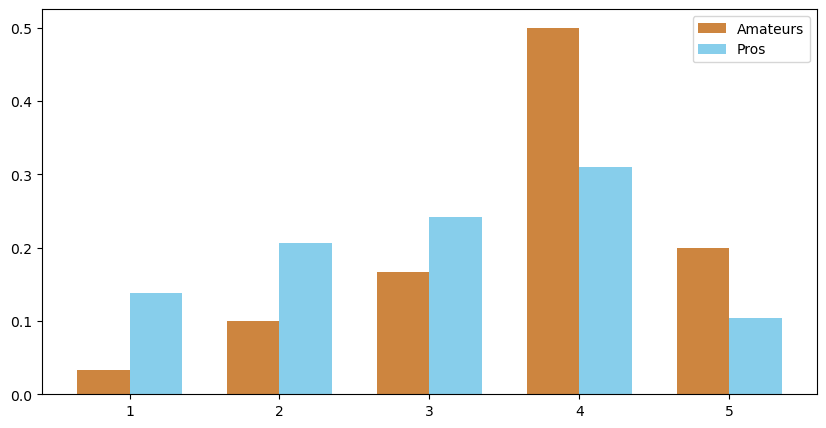

In [8]:
labels = ['Player 0', 'Player 1', 'Player 2', 'Player 3', 'Player 4']

#plt.hist([data[0], data[1]], bins=5, range=(0, 5), histtype='bar', stacked=False)

x = np.arange(len(labels))  # the label locations

width = 0.35

fig, ax = plt.subplots(figsize=(10,5))
rects1 = ax.bar(x - width/2 + 1, data[0], width, label='Amateurs', color="#CD853F")
rects2 = ax.bar(x + width/2 + 1, data[1], width, label='Pros', color="#87CEEB")
    
plt.legend(["Amateurs", "Pros"])

# Show the plot
plt.show()

## Evaluation

In [9]:
self_performance = [[0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]
team_performance = [[0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]

count = [0, 0]

for matchnum in range(22):
    match = json.load(open('./datas/matches/match_' + str(matchnum) + '/meta_info.json'))
    if match["real_opponents"]:
        team = 0 if match['team'] == 'amateurs' else 1
        
    for playernum in range(5):
        path_to_file = './datas/matches/match_' + str(matchnum) + '/player_' + str(playernum) + "/player_report.json"
        if (exists(path_to_file)):
            selfperfnote = int(json.load(open(path_to_file))["performance_evaluation"])
            teamperfnote = int(json.load(open(path_to_file))["performance_evaluation_teammates"])
            self_performance[team][selfperfnote - 1] += 1
            team_performance[team][teamperfnote - 1] += 1
            
            count[team] += 1
            
for i in range (2):
    for j in range(5):
        self_performance[i][j] = self_performance[i][j] / count[i]
        team_performance[i][j] = team_performance[i][j] / count[i]

print(self_performance)
print(team_performance)

[[0.016666666666666666, 0.1, 0.16666666666666666, 0.35, 0.36666666666666664], [0.10204081632653061, 0.10204081632653061, 0.10204081632653061, 0.42857142857142855, 0.2653061224489796]]
[[0.0, 0.0, 0.18333333333333332, 0.3333333333333333, 0.48333333333333334], [0.10204081632653061, 0.12244897959183673, 0.10204081632653061, 0.30612244897959184, 0.3673469387755102]]


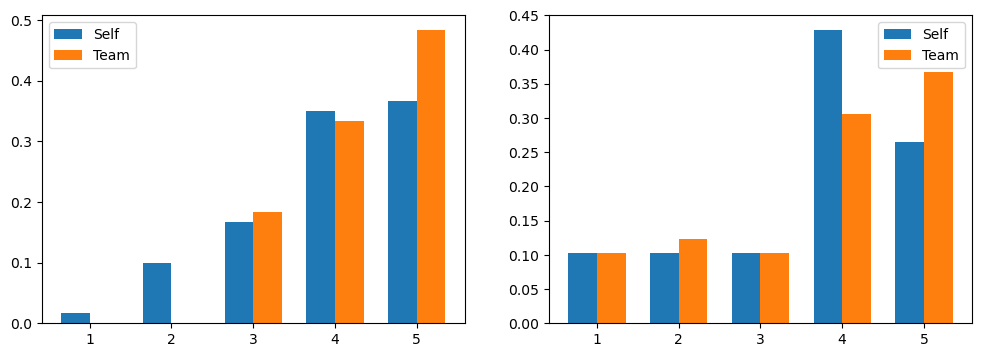

In [10]:
width = 0.35

fig, ax = plt.subplots(1, 2, figsize=(12,4))
rects1 = ax[0].bar(x - width/2 + 1, self_performance[0], width, label='Self')
rects2 = ax[0].bar(x + width/2 + 1, team_performance[0], width, label='Team')
    
ax[0].legend(["Self", "Team"])

rects1 = ax[1].bar(x - width/2 + 1, self_performance[1], width, label='Self')
rects2 = ax[1].bar(x + width/2 + 1, team_performance[1], width, label='Team')
    
ax[1].legend(["Self", "Team"])

# Show the plot
plt.show()

In [251]:
import math

useless_metrics = ["euler","xeuler","yeuler","zquaternion","wquaternion","xquaternion","yquaternion","zgravity","xgravity","ygravity","z"]

Xpros = np.zeros((110, 37))
Xamateurs = np.zeros((110, 37))

for matchnum in range(22):
    for playernum in range(5):
        meta = json.load(open('./datas/matches/match_' + str(matchnum) + '/meta_info.json'))
        team = meta['team']
        for metric_data in os.listdir("./datas/matches/match_" + str(matchnum) + "/player_" + str(playernum)):
            path_to_file = "./datas/matches/match_" + str(matchnum) + "/player_" + str(playernum) + "/" + str(metric_data)
            if exists(path_to_file):
                data = pd.read_csv(path_to_file)
                #data.pop("time")
                #for banmetric in useless_metrics:
                #    if banmetric in data.keys:
                #        data.pop(banmetric)
                print(data.iloc[:180] - data.iloc[:180].mean())
                average = data.iloc[:180] - data.iloc[:180].mean()
                average = average / np.std(average)
                #if average.name not in useless_metrics:
                i = 0
                for avg in average:
                    if type(avg) != str:
                        if np.isnan(avg) != True:
                            if team == "pros":
                                Xpros[(matchnum + 1) * (playernum + 1) - 1][i] = avg
                            else:
                                Xamateurs[(matchnum + 1) * (playernum + 1) - 1][i] = avg
                            i += 1

print(Xpros)
print(Xamateurs)

     time  emg_right_hand  emg_left_hand
0   -89.5        7.717048      -2.343103
1   -88.5       12.493604      -0.245423
2   -87.5       11.468423      -1.447313
3   -86.5        8.276236      -1.986606
4   -85.5        5.389442      -2.539835
..    ...             ...            ...
175  85.5        2.468993       0.127454
176  86.5        2.307247      -1.167791
177  87.5        0.803136      -0.286733
178  88.5        3.465076      -0.631579
179  89.5        1.476956      -1.111870

[180 rows x 3 columns]
     time  facial_skin_temperature
0   -89.5                -0.152719
1   -88.5                -0.162052
2   -87.5                -0.172719
3   -86.5                -0.184452
4   -85.5                -0.196977
..    ...                      ...
175  85.5                -0.093071
176  86.5                -0.087487
177  87.5                -0.088561
178  88.5                -0.092964
179  89.5                -0.099032

[180 rows x 2 columns]
     time           gsr
0   -89.5  -6589

In [247]:
X_embeddedpros = TSNE(n_components=2, learning_rate='auto', perplexity=30).fit_transform(np.array(Xpros))
X_embeddedpros.shape

X_embeddedamateurs = TSNE(n_components=2, learning_rate='auto', perplexity=30).fit_transform(np.array(Xamateurs))
X_embeddedamateurs.shape

print(X_embeddedpros)
print(X_embeddedamateurs)

[[-2.8505235e-03  2.3789301e+00]
 [-5.0571501e-01  3.1118312e+00]
 [-1.0771779e+00  2.9487159e+00]
 [-9.0918201e-01  3.0687025e+00]
 [-4.3659987e+00 -4.8291373e+00]
 [-4.3062987e+00 -4.8006601e+00]
 [-4.6087799e+00 -4.9453578e+00]
 [-5.3587403e+00 -4.9610629e+00]
 [-3.7191916e+00 -4.5009193e+00]
 [-4.6926217e+00 -4.9893107e+00]
 [-4.2123756e+00 -4.7554832e+00]
 [-4.7205009e+00 -5.0020356e+00]
 [ 6.9954800e-03  2.4624813e+00]
 [-4.5715599e+00 -4.9270601e+00]
 [-3.8464231e+00 -4.5714202e+00]
 [-3.8499815e+00 -4.5734301e+00]
 [-4.4899755e+00 -4.8889909e+00]
 [-4.1329341e+00 -4.7184010e+00]
 [-6.0356635e-01  2.4973426e+00]
 [-3.5366571e+00 -4.3916516e+00]
 [-4.6361189e+00 -4.9587097e+00]
 [-3.5372765e+00 -4.3922691e+00]
 [-1.2865988e+00  2.4540489e+00]
 [-4.8765097e+00 -5.0922341e+00]
 [-5.5085754e+00 -5.6512308e+00]
 [-6.0835451e-01  2.4911938e+00]
 [-4.8275518e+00 -5.0649328e+00]
 [-5.4876599e+00 -5.6319075e+00]
 [-8.3044839e-01  1.8784424e+00]
 [-4.0632796e+00 -4.6989188e+00]
 [-1.08703

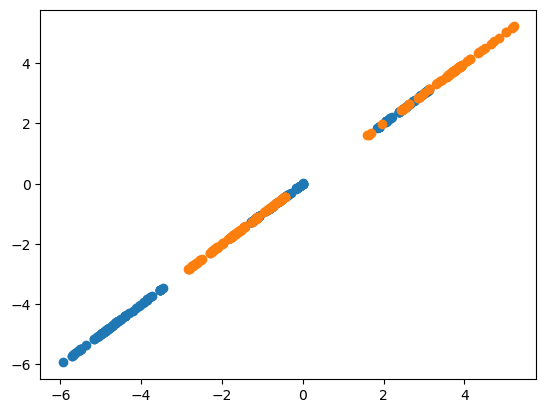

In [248]:
plt.scatter(X_embeddedpros, X_embeddedpros)
plt.scatter(X_embeddedamateurs, X_embeddedamateurs)

#fig, ax = plt.subplots()
#
#for i in range(110):
#    ax.scatter(X_embeddedpros[i][0], X_embeddedpros[i][1])
#    ax.scatter(X_embeddedamateurs[i][0], X_embeddedamateurs[i][1])